<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#!pip install -U scikit-learn

In [82]:
# Importações corretas (sem piplite e sem prints misturados)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # Importação correta
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import os
from scipy.stats import pearsonr
import numpy as np

# Configurações opcionais
%matplotlib inline

# Mensagem de confirmação (agora fora das importações)
print("✅ Módulos importados com sucesso!")

✅ Módulos importados com sucesso!


# Module 1: Importing Data Sets


Download the dataset by running the cell below.


> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [166]:
# 1. Carregamento dos dados
try:
    df = pd.read_csv('/kaggle/input/housing-csv/kc_house_data_NaN.csv')  # Ajuste o caminho se necessário
    print("✅ Dataset loaded with success!")
    print(f"📊 Dimensions: {df.shape[0]} Lines and {df.shape[1]} Columns")
    
    # Visualização das primeiras linhas
    print("\n👀 First 5 Rows:")
    print("")
    display(df.head())
    
except Exception as e:
    print(f"❌ Error trying to load the dataset: {e}")

✅ Dataset loaded with success!
📊 Dimensions: 21613 Lines and 22 Columns

👀 First 5 Rows:



,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [61]:
#Enter Your Code, Execute and take the Screenshot

# DataType Exhibition

print("\n🔍 Tipos de dados:")
print(df.dtypes)

# Screenshot 1: output of df.dtypes


🔍 Tipos de dados:
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [63]:
# Removing Uncessary Columns

print(df.columns.tolist())
df.drop(columns=['id', 'Unnamed: 0'], axis=1, inplace=True)

print("\nUpdated columns:")
print(df.columns.tolist())
      
# Descritive Statistics

print(df.describe())

# Screenshot 2: df.describe() Output


['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Updated columns:
['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [43]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [47]:
bedrooms_mean=df['bedrooms'].mean()
df.loc[df['bedrooms'].isna(), 'bedrooms'] = bedrooms_mean


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [48]:
bathrooms_mean=df['bathrooms'].mean()
df.loc[df['bathrooms'].isna(), 'bathrooms'] = bathrooms_mean

In [50]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

print(f"\nUsed mean values:\nBedrooms: {bedrooms_mean:.2f}\nBathrooms: {bathrooms_mean:.2f}")

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0

Used mean values:
Bedrooms: 3.37
Bathrooms: 2.12


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [64]:
#Enter Your Code, Execute and take the Screenshot

# Contagem de valores únicos para 'floor'
floor_counting = df['floors'].value_counts().to_frame()

print(floor_counts)

# Screenshot 3: Saída de value_counts()

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


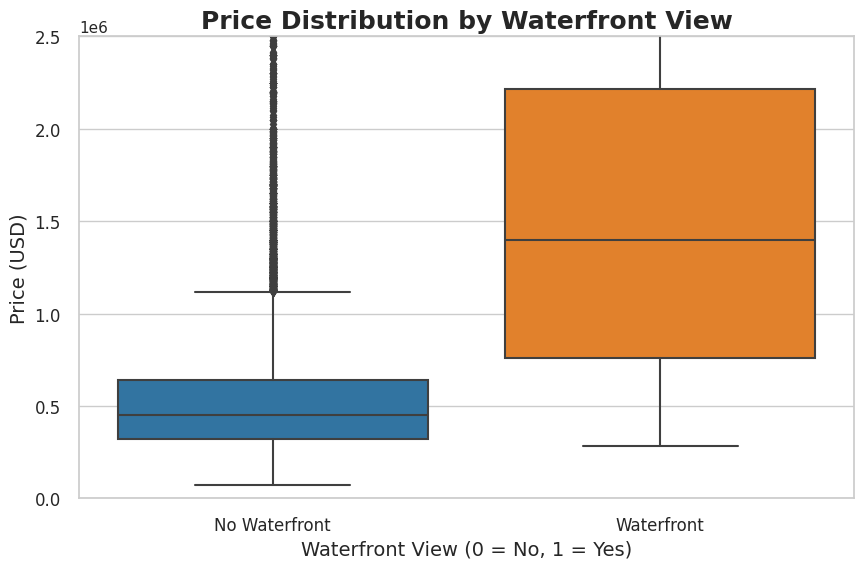

In [167]:
# Configuring the Styles

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Creating the boxplot with improved colors

boxplot = sns.boxplot(x='waterfront', y='price', data=df, palette=['#1f77b4', '#ff7f0e'])

# Customizing the labels

plt.title('Price Distribution by Waterfront View', fontsize=18, fontweight='bold')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Waterfront', 'Waterfront'], fontsize=12)
plt.yticks(fontsize=12)

# Limit the axis Y for better visibility 

plt.ylim(0, 2_500_000)  

# Calculate and show the number of outliers

q1 = df.groupby('waterfront')['price'].quantile(0.25)
q3 = df.groupby('waterfront')['price'].quantile(0.75)
iqr = q3 - q1
outliers_no = (df[df['waterfront'] == 0]['price'] > (q3[0] + 1.5 * iqr[0])).sum()
outliers_yes = (df[df['waterfront'] == 1]['price'] > (q3[1] + 1.5 * iqr[1])).sum()



### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


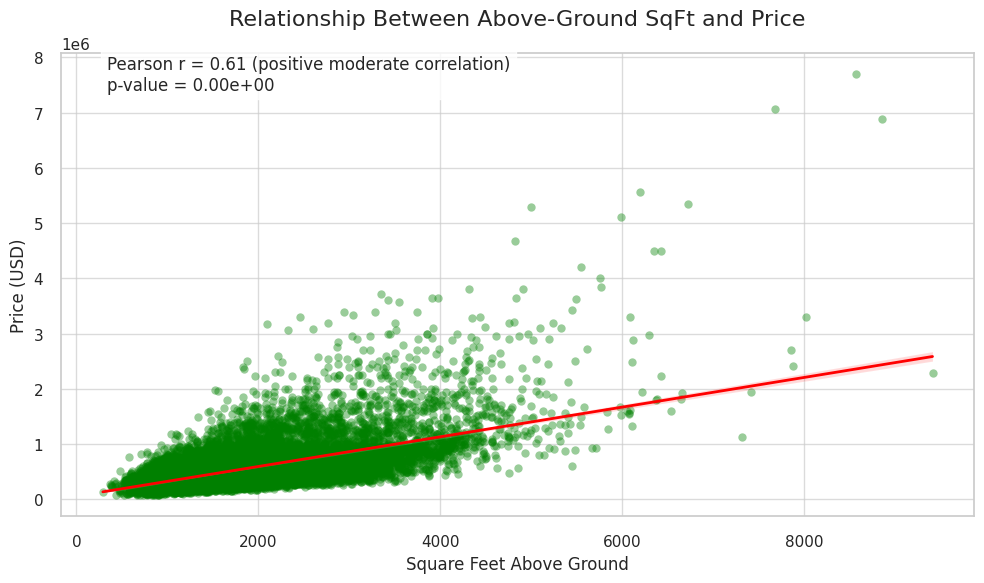

In [154]:
#Enter Your Code, Execute and take the Screenshot


# Set style and context
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(10, 6))

# Create regression plot with enhanced features
ax = sns.regplot(
    x='sqft_above', 
    y='price', 
    data=df,
    scatter_kws={'alpha':0.4, 'color':'green'},
    line_kws={'color':'red', 'linewidth':2}
)

# Calculate correlation coefficient and p-value
corr, p_value = pearsonr(df['sqft_above'], df['price'])
correlation_strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.3 else "weak"
direction = "positive" if corr > 0 else "negative"

# Add correlation info to plot
plt.text(
    0.05, 0.92,
    f'Pearson r = {corr:.2f} ({direction} {correlation_strength} correlation)\np-value = {p_value:.2e}',
    transform=ax.transAxes,
    bbox=dict(facecolor='white', alpha=0.8)
)

# Customization of plot area

plt.title('Relationship Between Above-Ground SqFt and Price', pad=20, fontsize=16) #title
plt.xlabel('Square Feet Above Ground', fontsize=12) #XLabel
plt.ylabel('Price (USD)', fontsize=12) #YLabel
plt.grid(True, alpha=0.7) #transparency of the Grid Layout

# Show plot

plt.tight_layout()
plt.show()

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


Features Correlated with Price (Descending Order)
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525885
view             0.397293
sqft_basement    0.323816
bedrooms         0.308890
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Most correlated feature (excluding price): sqft_living (r = 0.7020)



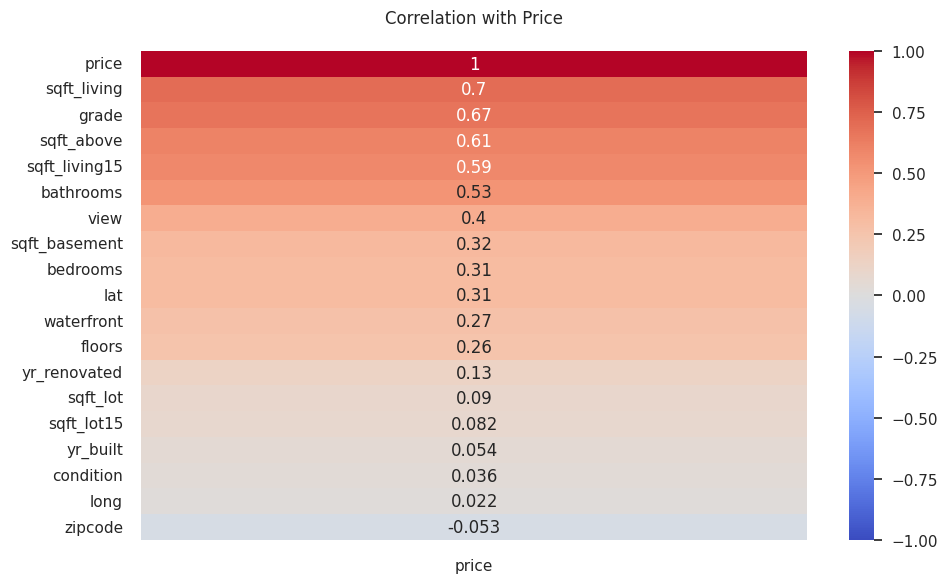

In [149]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate correlations with price and sort
price_correlations = df_numeric.corr()['price'].sort_values(ascending=False)

# Display results
print("Features Correlated with Price (Descending Order)")
print("================================================")
print(price_correlations)

# Identify top correlated feature (excluding price itself)

top_feature = price_correlations.index[1]  # index[0] is price itself
top_corr = price_correlations.iloc[1]

print(f"\nMost correlated feature (excluding price): {top_feature} (r = {top_corr:.4f})")
print("")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Price', pad=20)
plt.tight_layout()
plt.show()

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


Linear Regression Results: Longitude vs. Price
Coefficient (slope): 56377.7228
Intercept: 7430229.3104
R²: 0.0005



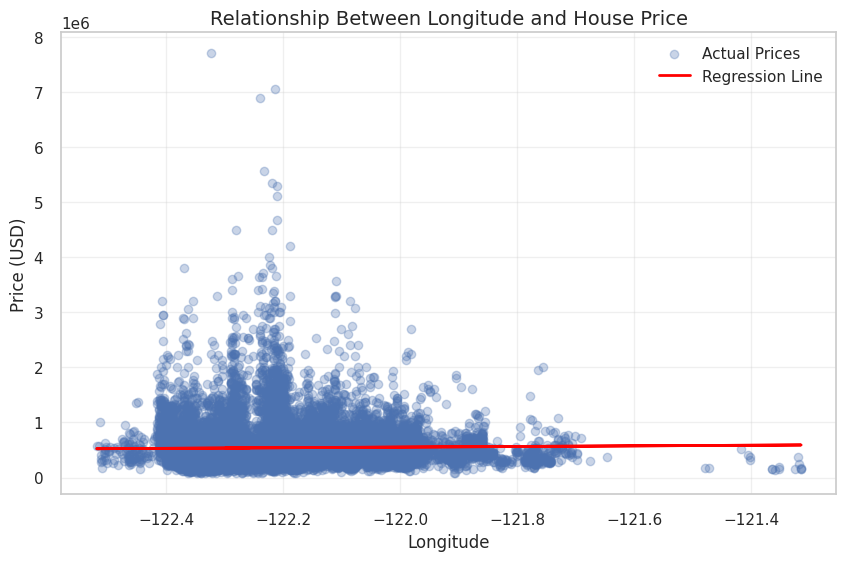


SCREENSHOT ANSWER AREA:
-----------------------
R² value: 0.0005



In [158]:
# Preparing the data

X = df[['long']]  #  Using double brackets to keep it as a DataFrame
y = df['price']    # The data Target variable 'price'

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R²
r_squared = model.score(X, y)

# Display results
print("Linear Regression Results: Longitude vs. Price")
print("============================================")
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R²: {r_squared:.4f}")
print("")

# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Actual Prices')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Relationship Between Longitude and House Price', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# For project answer

print("\nSCREENSHOT ANSWER AREA:")
print("-----------------------")
print(f"R² value: {r_squared:.4f}")
print("")

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.



Linear Regression Results
Independent Variable: sqft_living
Dependent Variable: price

Coefficient (slope): 280.62
Intercept: -43580.74
R²: 0.4929

Graphical Area Separator
--------------------------------------------------------------------------------------



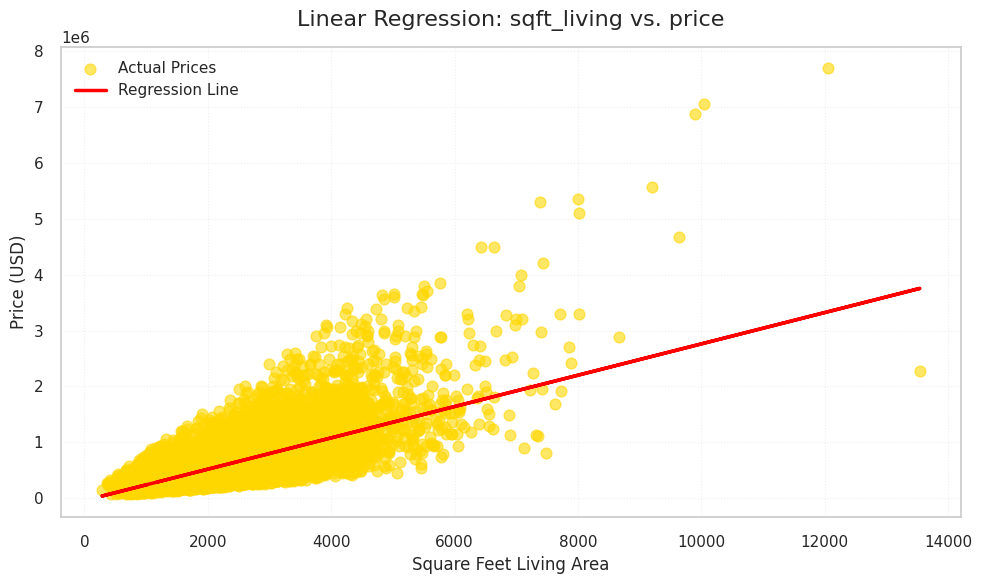


SCREENSHOT SUBMISSION AREA:
-----------------------
R² value: 0.4929


In [160]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data
X = df[['sqft_living']]  # Feature matrix (must be 2D)
y = df['price']           # Target vector

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate predictions and R² score
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Display results
print("")
print("Linear Regression Results")
print("=========================")
print(f"Independent Variable: sqft_living")
print(f"Dependent Variable: price")
print(f"\nCoefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R²: {r_squared:.4f}")

# Separator for better presentation of the graphical area
print("")
print("Graphical Area Separator")
print("--------------------------------------------------------------------------------------")
print("")

# Create a visualization
plt.figure(figsize=(10, 6))

# Scatter plot with gold-colored points and more dispersion
plt.scatter(X, y, color='gold', alpha=0.6, s=60, label='Actual Prices')  

# Regression line in red (previously missing)
plt.plot(X, y_pred, color='red', linewidth=2.5, label='Regression Line')

# Customize labels and title
plt.title('Linear Regression: sqft_living vs. price', pad=15, fontsize=16)
plt.xlabel('Square Feet Living Area', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()

# Improve grid visibility with a dotted style
plt.grid(True, linestyle='dotted', linewidth=0.8, alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

# For screenshot purposes
print("\nSCREENSHOT SUBMISSION AREA:")
print("-----------------------")
print(f"R² value: {r_squared:.4f}")
print("")


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Feature selection
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Cleaning the data with the deletion of the rows thats present missing values

clean_df = df[features + ['price']].dropna()

X = clean_df[features]
y = clean_df['price']

# Initialize and fit model

model = LinearRegression()
model.fit(X, y)


# Display results
print("Multiple Linear Regression Results (After Handling Missing Values)")
print("===============================================================")
print("")
print(f"Original dataset size: {len(df)}")
print(f"Clean dataset size: {len(clean_df)}")
print(f"Rows dropped: {len(df) - len(clean_df)}")

# Show coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature:>15}: {coef:>10.2f}")

print("")

Multiple Linear Regression Results (After Handling Missing Values)

Original dataset size: 21613
Clean dataset size: 21597
Rows dropped: 16

Feature Coefficients:
         floors:  -29691.18
     waterfront:  601759.05
            lat:  672795.24
       bedrooms:  -25866.07
  sqft_basement: 90938495860216.19
           view:   66992.50
      bathrooms:   -3774.59
  sqft_living15:       3.83
     sqft_above: 90938495860216.36
          grade:   82844.93
    sqft_living: -90938495860022.06



Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [119]:
#Enter Your Code, Execute and take the Screenshot

# Create pipeline with imputation using the combination of available libraries like make_pipeline, simpleimputer and linear regression

pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Replace NaN with mean values
    LinearRegression()
)

pipeline.fit(X, y)
r_squared = pipeline.score(X, y)

print(f"\nR²: {r_squared:.4f}")
print("")


R²: 0.6578



### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [103]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [141]:
#Enter Your Code, Execute and take the Screenshot

# Defining  features

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Preparing the data (this means that will be necessary drop some missing values)

clean_df = df[features + ['price']].dropna()
X = clean_df[features]
y = clean_df['price']

# Create preprocessing and modeling pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle any remaining missing values
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Fitting the pipelines

pipeline.fit(X, y)

# R² Usual Calculating Process

r_squared = pipeline.score(X, y)

# Display results with more polished presentation

print("")
print("Pipeline Modeling Results")
print("")
print("========================")
print("")
print("Pipeline Steps:")
for step in pipeline.named_steps:
    print(f"- {step}")
print(f"\nR²: {r_squared:.4f}")
print(f"Number of features after polynomial expansion: {pipeline['polynomial'].n_output_features_}")
print("")

# Defining screenshot submission print area:

print("\nREQUIRED SCREENSHOT OUTPUT:")
print("--------------------------")
print("")
print(f"R² value: {r_squared:.4f}")
print("")


Pipeline Modeling Results


Pipeline Steps:
- imputer
- scaler
- polynomial
- model

R²: 0.7514
Number of features after polynomial expansion: 77


REQUIRED SCREENSHOT OUTPUT:
--------------------------

R² value: 0.7514



# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [133]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("")
print("Splitting the data into Training and Testing Sets:")
print("")
print("Number of test samples:", x_test.shape[0])
print("=================================")
print("Number of training samples:",x_train.shape[0])
print("")


Splitting the data into Training and Testing Sets:

Number of test samples: 3242
Number of training samples: 18371



### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [88]:
from sklearn.linear_model import Ridge
print("Done!")

Done!


In [162]:
#Enter Your Code, Execute and take the Screenshot

# Defining features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Checking for missing values

print("")
print("Missing values per feature:")
print("")
print(X.isna().sum())


# Train-test split with random state for reproducibility

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1
)

# Create pipeline with imputation, scaling, and Ridge regression

ridge_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace NaNs with mean
    ('scaler', StandardScaler()),                # Standardize features
    ('ridge', Ridge(alpha=0.1))                 # Ridge regression
])

# Fiting the model

ridge_pipeline.fit(x_train, y_train)

# Calculating R² scores

train_r2 = ridge_pipeline.score(x_train, y_train)
test_r2 = ridge_pipeline.score(x_test, y_test)

# Displaying the corresponding results

print("")
print("\nRidge Regression Results (α=0.1)")
print("=================================")
print("")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Show coefficients

print("\nFeature Coefficients:")
for feature, coef in zip(features, ridge_pipeline.named_steps['ridge'].coef_):
    print(f"{feature:>15}: {coef:>10.2f}")

# Necessary For screenshot submission

print("\nREQUIRED SCREENSHOT VALUE:")
print("--------------------------")
print("")
print(f"Test R²: {test_r2:.4f}")
print("")



Missing values per feature:

floors            0
waterfront        0
lat               0
bedrooms         13
sqft_basement     0
view              0
bathrooms        10
sqft_living15     0
sqft_above        0
grade             0
sqft_living       0
dtype: int64


Ridge Regression Results (α=0.1)

Training R²: 0.6594
Test R²: 0.6479

Feature Coefficients:
         floors:  -15854.44
     waterfront:   49946.19
            lat:   94168.64
       bedrooms:  -24018.57
  sqft_basement:   40893.31
           view:   53282.10
      bathrooms:   -1450.89
  sqft_living15:   -1553.37
     sqft_above:   80108.60
          grade:   95088.43
    sqft_living:   92138.56

REQUIRED SCREENSHOT VALUE:
--------------------------

Test R²: 0.6479



### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [161]:
#Enter Your Code, Execute and take the Screenshot

# Define features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1
)

# Create pipeline with imputation, polynomial features, scaling, and Ridge
ridge_poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # 2nd order polynomial
    ('scaler', StandardScaler()),                # Scale features
    ('ridge', Ridge(alpha=0.1))                 # Ridge regression
])

# Fit the model
ridge_poly_pipeline.fit(x_train, y_train)

# Calculate R² scores
train_r2 = ridge_poly_pipeline.score(x_train, y_train)
test_r2 = ridge_poly_pipeline.score(x_test, y_test)

# Display results
print("Polynomial Ridge Regression Results (α=0.1)")
print("==========================================")
print(f"Number of original features: {len(features)}")
print(f"Number of polynomial features: {ridge_poly_pipeline.named_steps['poly'].n_output_features_}")
print(f"\nTraining R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# For screenshot submission
print("\nREQUIRED SCREENSHOT:")
print("--------------------------")
print(f"Test R² value: {test_r2:.4f}")


Polynomial Ridge Regression Results (α=0.1)
Number of original features: 11
Number of polynomial features: 77

Training R²: 0.7446
Test R²: 0.7040

REQUIRED SCREENSHOT:
--------------------------
Test R² value: 0.7040


<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/DA0101EN_FA_Image21.png" alt="share notebook" style="display: block; margin-left: auto; margin-right: auto;"></p>
        <p></p>
<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  
          


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |


--!>
<p>
